In [1]:
import pandas as pd
import requests
import os
import json
import numpy as np
import datetime as dt
from pathlib import Path
import statsmodels.api as sm
%matplotlib inline

In [2]:
api_key = "dbade5cbe722962c96987ebfb6b65618"
accept = "application/json"
headers = {'apikey' : api_key, 'accept' : accept}

In [4]:
zipcode = '85331'
startyear = '2015'
endyear = '2020'

Input Postal Code. 85331


In [5]:
print(zipcode)

85331


In [6]:
request_url = f'https://api.gateway.attomdata.com/propertyapi/v1.0.0/salestrend/snapshot?geoid=ZI{zipcode}&interval=monthly&startyear={startyear}&endyear={endyear}&startmonth=january&endmonth=december'

In [7]:
response_data = requests.get(request_url,headers = headers)
print(response_data.status_code)

200


In [8]:
def pretty_print_response(response_data):
    print(json.dumps(response_data, indent=4, sort_keys=True))

salestrend_df = response_data.json()

In [9]:
df = pd.json_normalize(salestrend_df["salestrends"])

In [10]:
df_avgprices = pd.DataFrame(df, columns=['daterange.start','SalesTrend.avgsaleprice'])
df_avgprices['daterange.start'] = pd.to_datetime(df_avgprices['daterange.start'])
df_avgprices.rename(columns={"SalesTrend.avgsaleprice": "avg_sale_prices", "daterange.start" : "date"}, inplace=True)
df_avgprices = df_avgprices.set_index('date')

In [11]:
df_avgprices.head()

,avg_sale_prices
date,
2015-01-01,437000.0
2015-02-01,407070.0
2015-03-01,437538.0
2015-04-01,458834.0
2015-05-01,461629.0


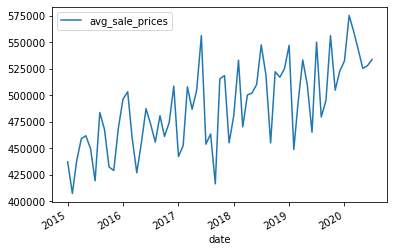

In [14]:
df_avgprices.plot()

In [17]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(df_avgprices['avg_sale_prices'])

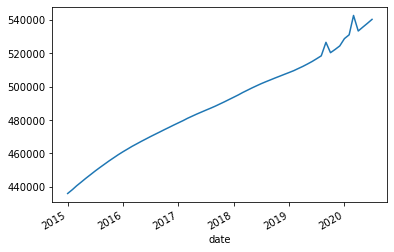

In [18]:
ts_trend.plot()

In [24]:
returns = pd.DataFrame(df, columns=['daterange.start','SalesTrend.avgsaleprice'])

returns['daterange.start'] = pd.to_datetime(returns['daterange.start'])

returns.rename(columns={"SalesTrend.avgsaleprice": "Returns", "daterange.start" : "Date"}, inplace=True)

returns = returns.set_index('Date')

returns = returns.pct_change()
returns.dropna(inplace=True)
returns.head()

,Returns
Date,
2015-02-01,-0.068490
2015-03-01,0.074847
2015-04-01,0.048672
2015-05-01,0.006092
2015-06-01,-0.026526


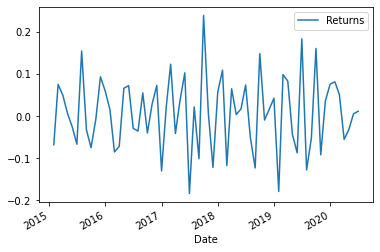

In [22]:
returns.plot()

In [27]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(returns['Returns'])

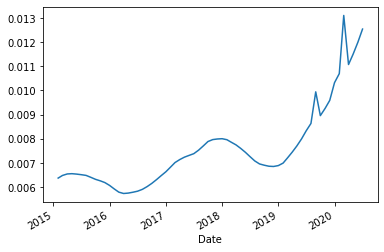

In [28]:
ts_trend.plot()